In [286]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from numpy.linalg import inv

In [287]:
plt.style.use(['ggplot'])
data = pd.read_csv('data.txt')
data.columns = ["id", "long", "lati", "alti"]
data = data.drop('id',axis = 1);

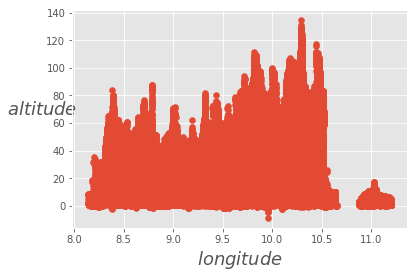

In [288]:
plt.scatter(data['long'],data['alti'])
plt.xlabel("$longitude$", fontsize=18)
plt.ylabel("$altitude$", rotation=0, fontsize=18)
plt.show()

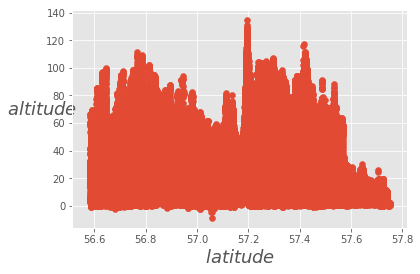

In [289]:
plt.scatter(data['lati'],data['alti'])
plt.xlabel("$latitude$", fontsize=18)
plt.ylabel("$altitude$", rotation=0, fontsize=18)
plt.show()

In [290]:
x = data.drop('alti',axis = 1)
x['bias'] = 1
x = x[['bias','lati','long']]
y = data['alti']

In [291]:
y.head()

0    17.614840
1    18.083536
2    18.279465
3    18.422974
4    19.124889
Name: alti, dtype: float64

In [292]:
X = np.array(x)
y = np.array(y)

y.shape

(434873,)

In [293]:
X[:,1:] = (X[:,1:]-np.mean(X[:,1:], axis = 0))/np.std(X[:,1:],axis = 0)
y = (y-np.mean(y))/np.std(y)

# print(X.mean(axis = 0))

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.05)
X_test = np.concatenate([X_test,X_val], axis = 0)
y_test = np.concatenate([y_test, y_val])

In [296]:
X_train.shape

(304411, 3)

In [297]:
X_transpose = X.T
Y = y
coeff = inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)
loss = 0.5*pow((Y-coeff[0]-coeff[1]*X[:,1]-coeff[2]*X[:,2]),2).sum()
print(coeff)
print(loss)

[  9.60416100e-15  -1.90628441e-01   1.50381653e-01]
211684.477106


In [298]:
def  lossfunc(x_,w_,y_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)

In [299]:
w = np.random.randn((3))
print(w.dot(X_train.T).shape)

(304411,)


In [300]:
#Function to calculate Rsquared and RMS
def RSq_RMS(w,x,y):
    RSS =  pow(w.dot(x.T) - y,2).sum()
    TSS =  pow(y - y.mean(),2).sum()
    n = len(y)
    rs = 1 - (RSS/TSS)
    RMS = pow(RSS/n,0.5)
    return [rs,RMS]

In [301]:
# Gradient Descent 

alpha =0.01
itns = 1000
counter = []
losses = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    y_hat = w.dot(X_train.T)
    
    if i%20 == 0:
        loss_ = lossfunc(X_train,w,y_train)
        losses.append(loss_)
        counter.append(i)
        print("iteration: {} loss : {}" .format(i,loss_))
    w_der = (y_hat-y_train)*(X_train.T)
    w_der_norm = np.mean(w_der, axis = 1)
    w = w - alpha*w_der_norm
    
print(w)

[0 1 1]
iteration: 0 loss : 2.131287036435442
iteration: 20 loss : 1.3637426919261588
iteration: 40 loss : 0.955431892048401
iteration: 60 loss : 0.7380342690833225
iteration: 80 loss : 0.6221267713613555
iteration: 100 loss : 0.5601970786442938
iteration: 120 loss : 0.5269968717115853
iteration: 140 loss : 0.5091056553916485
iteration: 160 loss : 0.49938704679886126
iteration: 180 loss : 0.49404386147008866
iteration: 200 loss : 0.49105365244642396
iteration: 220 loss : 0.4893375424127754
iteration: 240 loss : 0.488318588967742
iteration: 260 loss : 0.4876870822537752
iteration: 280 loss : 0.4872757785044347
iteration: 300 loss : 0.4869935444769873
iteration: 320 loss : 0.48679004147396643
iteration: 340 loss : 0.48663690790840414
iteration: 360 loss : 0.48651771480735073
iteration: 380 loss : 0.48642258911955727
iteration: 400 loss : 0.4863453230331222
iteration: 420 loss : 0.48628180933787013
iteration: 440 loss : 0.48622918580460606
iteration: 460 loss : 0.4861853600889371
iteratio

In [302]:
RSq_RMS(w,X_train,y_train)

[0.026210345384055089, 0.98585945022119703]

In [303]:
# Gradient Descent for testing

loss_gd_test = lossfunc(X_test, w, y_test)
print(loss_gd_test)

0.488689611805


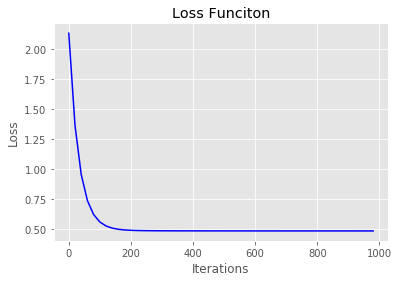

In [304]:
plt.plot(counter, losses, 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [305]:
# Stochastic Gradient Descent

alpha =0.0005
itns = 10000

losses_st = []

w = np.array([0,1,1])
print(w)
for i in range(itns):
    index = np.random.randint(X_train.shape[0])
#     print(index)
    x_st = X_train[index]
    y_st = y_train[index]
    y_hat = np.sum(w*x_st)
#     print(x_st, y_hat, y_st)
    loss_ = lossfunc(X_train,w,y_train)
    losses_st.append(loss_)
    if i%2000 == 0:
        print("iteration: {} loss : {}" .format(i,loss_))


    w_der = (y_hat-y_st)*(x_st)
#     print(w_der)
    w = w - alpha*w_der
    
print(w)


[0 1 1]
iteration: 0 loss : 2.131287036435442
iteration: 2000 loss : 0.5580617104880786
iteration: 4000 loss : 0.49454184853365735
iteration: 6000 loss : 0.4873546767266578
iteration: 8000 loss : 0.4871536918149043
[ 0.03062491 -0.15203659  0.14353747]


In [306]:
RSq_RMS(w,X_train,y_train)

[0.024004401485454019, 0.98697546146449666]

In [307]:
# Stochastic Gradient Descent for testing

loss_sgd_test = lossfunc(X_test, w, y_test)
print(loss_sgd_test)


0.489727355651


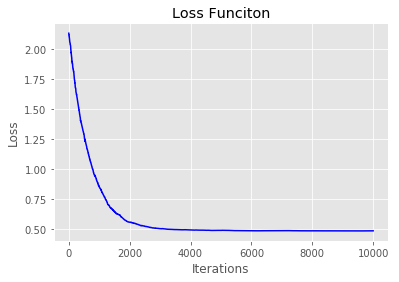

In [308]:
plt.plot(losses_st, 'b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Funciton')
plt.show()

In [309]:
def  lossL1(x_,w_,y_,lambda_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)+(lambda_)*np.sum(np.abs(w_[1:]))

In [310]:
# Gradient Descent with L1 reg

alpha =0.001
itns = 1000
lambdas = [0.1,0.5,1,2]
losses_l1 = {}
losses_l1_val = {}
counter_l1 = []
w_storel1 = {}
for lambda_ in lambdas:
    losses_l1[lambda_] = []
    w = np.array([0,1,1])
    for i in range(itns):
        y_hat = w.dot(X_train.T)  
        if i%20 == 0:  
            loss_ = lossL1(X_train,w,y_train,lambda_)
            losses_l1[lambda_].append(loss_)
            print("lambda: {} iteration: {} loss : {}" .format(lambda_,i,loss_))   
            counter_l1.append(i)
        w_der = (y_hat-y_train)*(X_train.T)
        w_der_norm = np.mean(w_der, axis = 1) + lambda_*np.sign(w)
        w = w - alpha*w_der_norm
    w_storel1[lambda_] = w
    losses_l1_val[lambda_] = lossL1(X_val, w, y_val,lambda_)

lambda: 0.1 iteration: 0 loss : 2.3312870364354423
lambda: 0.1 iteration: 20 loss : 2.218841268395598
lambda: 0.1 iteration: 40 loss : 2.113232382123926
lambda: 0.1 iteration: 60 loss : 2.014044435881622
lambda: 0.1 iteration: 80 loss : 1.9208866388770989
lambda: 0.1 iteration: 100 loss : 1.8333920003934039
lambda: 0.1 iteration: 120 loss : 1.7512158668672657
lambda: 0.1 iteration: 140 loss : 1.6740348810454135
lambda: 0.1 iteration: 160 loss : 1.6015444339905713
lambda: 0.1 iteration: 180 loss : 1.5334593908997112
lambda: 0.1 iteration: 200 loss : 1.4695116635006613
lambda: 0.1 iteration: 220 loss : 1.4094494910512725
lambda: 0.1 iteration: 240 loss : 1.3530364359922329
lambda: 0.1 iteration: 260 loss : 1.3000507575726834
lambda: 0.1 iteration: 280 loss : 1.2502833085024625
lambda: 0.1 iteration: 300 loss : 1.2035385714990678
lambda: 0.1 iteration: 320 loss : 1.1596326322367077
lambda: 0.1 iteration: 340 loss : 1.118392774025603
lambda: 0.1 iteration: 360 loss : 1.0796567957964398
lam

lambda: 2 iteration: 160 loss : 2.86598882407748
lambda: 2 iteration: 180 loss : 2.561460812476719
lambda: 2 iteration: 200 loss : 2.275466307331812
lambda: 2 iteration: 220 loss : 2.0068770193810863
lambda: 2 iteration: 240 loss : 1.7546333536725647
lambda: 2 iteration: 260 loss : 1.5177402271053362
lambda: 2 iteration: 280 loss : 1.2952631406220199
lambda: 2 iteration: 300 loss : 1.0863244905477158
lambda: 2 iteration: 320 loss : 0.8901001045148849
lambda: 2 iteration: 340 loss : 0.7058159883000821
lambda: 2 iteration: 360 loss : 0.5664549391404623
lambda: 2 iteration: 380 loss : 0.506194918426073
lambda: 2 iteration: 400 loss : 0.5012402472640886
lambda: 2 iteration: 420 loss : 0.5031248070941742
lambda: 2 iteration: 440 loss : 0.5006072114787384
lambda: 2 iteration: 460 loss : 0.5058777614197634
lambda: 2 iteration: 480 loss : 0.5029169466039356
lambda: 2 iteration: 500 loss : 0.5040118906413786
lambda: 2 iteration: 520 loss : 0.50008791911921
lambda: 2 iteration: 540 loss : 0.5037

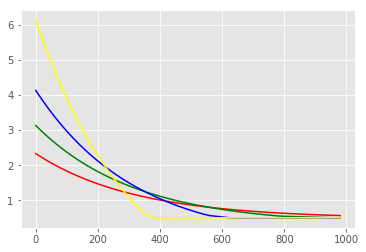

In [311]:
colors = np.array(['red','green','blue','yellow'])
for i,lamb in enumerate(losses_l1.keys()):
    plt.plot(counter, losses_l1[lamb],color = colors[i])

0.559587630796
0.50161371323
0.5025032198
0.504175381527


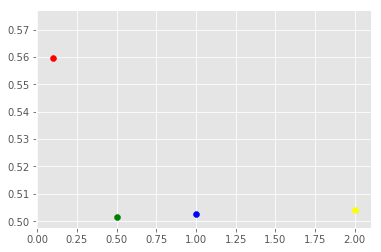

In [312]:
for i,lamb in enumerate(losses_l1_val.keys()):
    plt.scatter(lamb,losses_l1_val[lamb],color=colors[i])
    print(losses_l1_val[lamb])

In [313]:
RSq_RMS(w_storel1[0.5],X_train,y_train)

[5.2786346529276607e-05, 0.99901259349020044]

In [314]:
# Gradient Descent with L1 reg for testing
loss_l1gd_test = lossL1(X_test, w_storel1[0.5], y_test, 0.5)
print(w_storel1[0.5])
print(loss_l1gd_test)

[  7.97521903e-05  -1.09767770e-04   3.76036032e-04]
0.50245428958


In [315]:
def  lossL2(x_,w_,y_,lambda_):
    m = len(y_)
    return (0.5/m)*np.sum((w_.dot(x_.T)-y_)**2)+0.5*lambda_*np.sum(w_**2)

In [316]:
# Gradient Descent with L2 reg

alpha =0.001
itns = 1000
lambdas = [0.5,1,2,4,6]
losses_l2 = {}
losses_l2_val = {}
counter_l2 = []
w_store = {}

for lambda_ in lambdas:
    losses_l2[lambda_] = []
    w = np.array([0,1,1])
    for i in range(itns):
        y_hat = w.dot(X_train.T)  
        if i%20 == 0:  
            loss_ = lossL2(X_train,w,y_train,lambda_)
            losses_l2[lambda_].append(loss_)
            counter_l2.append(i)
            print("lambda: {} iteration: {} loss : {}" .format(lambda_,i,loss_))
            
        w_der = (y_hat-y_train)*(X_train.T)
        w_der_norm = np.mean(w_der, axis = 1) + lambda_*w
        w = w - alpha*w_der_norm
    w_store[lambda_] = w
    losses_l2_val[lambda_] = lossL2(X_val, w, y_val,lambda_)

lambda: 0.5 iteration: 0 loss : 2.631287036435442
lambda: 0.5 iteration: 20 loss : 2.4614882616015414
lambda: 0.5 iteration: 40 loss : 2.305182052450823
lambda: 0.5 iteration: 60 loss : 2.1612958775926474
lambda: 0.5 iteration: 80 loss : 2.0288424758282986
lambda: 0.5 iteration: 100 loss : 1.906913076340199
lambda: 0.5 iteration: 120 loss : 1.7946711579610672
lambda: 0.5 iteration: 140 loss : 1.6913467046587112
lambda: 0.5 iteration: 160 loss : 1.5962309177804865
lambda: 0.5 iteration: 180 loss : 1.508671348738751
lambda: 0.5 iteration: 200 loss : 1.428067418706516
lambda: 0.5 iteration: 220 loss : 1.3538662945507243
lambda: 0.5 iteration: 240 loss : 1.2855590926774232
lambda: 0.5 iteration: 260 loss : 1.2226773847154366
lambda: 0.5 iteration: 280 loss : 1.1647899810383104
lambda: 0.5 iteration: 300 loss : 1.1114999700326904
lambda: 0.5 iteration: 320 loss : 1.0624419927779032
lambda: 0.5 iteration: 340 loss : 1.0172797344184317
lambda: 0.5 iteration: 360 loss : 0.9757036149993685
lamb

lambda: 4 iteration: 200 loss : 1.101125667105779
lambda: 4 iteration: 220 loss : 0.9803169520406081
lambda: 4 iteration: 240 loss : 0.8836927484220017
lambda: 4 iteration: 260 loss : 0.8064115518912274
lambda: 4 iteration: 280 loss : 0.7446010874311657
lambda: 4 iteration: 300 loss : 0.6951642764566751
lambda: 4 iteration: 320 loss : 0.655624048121651
lambda: 4 iteration: 340 loss : 0.6239992184341878
lambda: 4 iteration: 360 loss : 0.5987052175725289
lambda: 4 iteration: 380 loss : 0.5784746909305043
lambda: 4 iteration: 400 loss : 0.56229399528612
lambda: 4 iteration: 420 loss : 0.5493524079840311
lambda: 4 iteration: 440 loss : 0.5390015040644843
lambda: 4 iteration: 460 loss : 0.5307226657802961
lambda: 4 iteration: 480 loss : 0.5241010964510425
lambda: 4 iteration: 500 loss : 0.518805036530231
lambda: 4 iteration: 520 loss : 0.5145691404388676
lambda: 4 iteration: 540 loss : 0.5111811812101721
lambda: 4 iteration: 560 loss : 0.5084714167426458
lambda: 4 iteration: 580 loss : 0.50

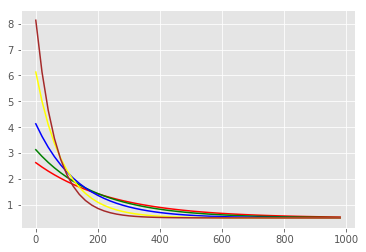

In [317]:
colors = np.array(['red','green','blue','yellow','brown','pink'])
for i,lamb in enumerate(losses_l2.keys()):
    plt.plot(counter, losses_l2[lamb],color = colors[i])

0.52731155314
0.511279385817
0.501237531253
0.500037695087
0.50044715438


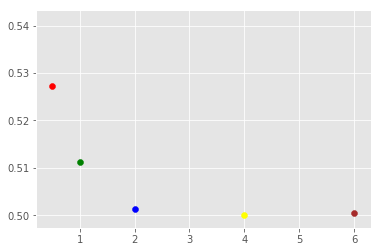

In [322]:
for i,lamb in enumerate(losses_l2_val.keys()):
    plt.scatter(lamb,losses_l2_val[lamb],color=colors[i])
    print(losses_l2_val[lamb])

In [319]:
print(RSq_RMS(w_store[4],X_train,y_train))

[0.0048164781204639295, 0.99663013297780567]


In [321]:
# Gradient Descent with L2 reg for testing
loss_l2gd_test = lossL2(X_test, w_store[4], y_test, 4)
print(w_store[4])
print(loss_l2gd_test)


[-0.00025406 -0.01826322  0.01450066]
0.500882382707
